In [1]:
__author__ = 'xuanzee'

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

Perspectives to check:
GDP vs life expectancy
1. overall
2. across different countries
3. time series view

In [3]:
data = pd.read_csv('all_data.csv')

In [4]:
print(data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [6]:
data.rename(columns={'Life expectancy at birth (years)': 'life_expectancy'}, inplace=True)

In [7]:
data.describe(include='all')

,Country,Year,life_expectancy,GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


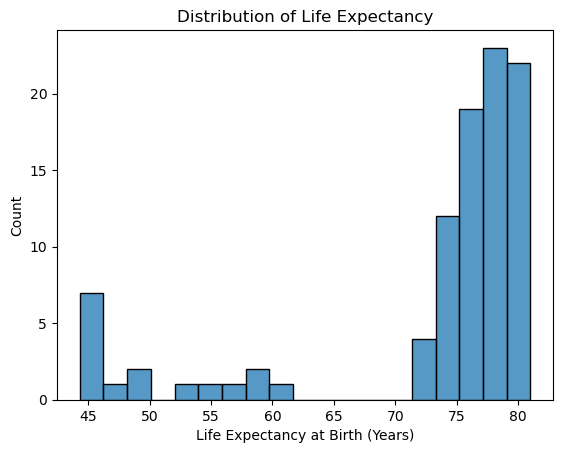

<Figure size 640x480 with 0 Axes>

In [8]:
#visualize the distribution of life expectancy
sns.histplot(data=data, x='life_expectancy')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy at Birth (Years)')
plt.show()
plt.clf()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Chile'),
  Text(1, 0, 'China'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Mexico'),
  Text(4, 0, 'United States of America'),
  Text(5, 0, 'Zimbabwe')])

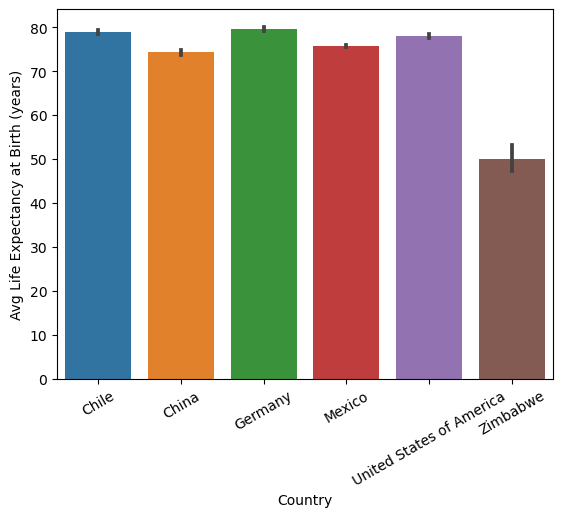

In [9]:
#Visualize average life expectancy by country
sns.barplot(data=data, x='Country', y='life_expectancy')
plt.ylabel('Avg Life Expectancy at Birth (years)')
plt.xticks(rotation=30)

Zimbabwe has much lower average life expectancy.

In [10]:
#Shortened the name for USA for easier display onwards.
data['Country'] = data.Country.replace(to_replace='United States of America', value='U.S.A.')

In [11]:
#Get the actual averages.
data.groupby('Country').mean().life_expectancy

Country
Chile       78.94375
China       74.26250
Germany     79.65625
Mexico      75.71875
U.S.A.      78.06250
Zimbabwe    50.09375
Name: life_expectancy, dtype: float64

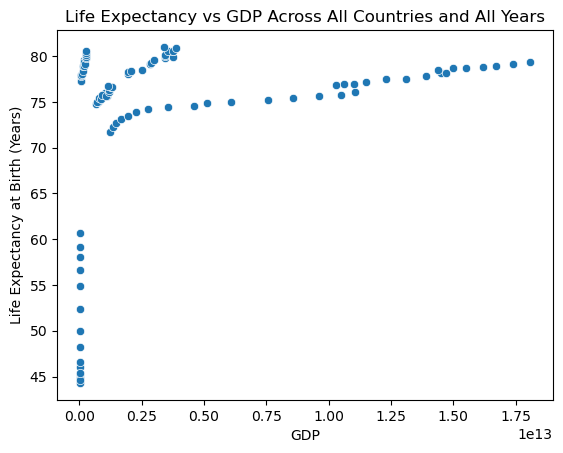

<Figure size 640x480 with 0 Axes>

In [12]:
#try showing GDP vs. life expectancy in general.
sns.scatterplot(data=data, x='GDP', y='life_expectancy')
plt.title('Life Expectancy vs GDP Across All Countries and All Years')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.show()
plt.clf()

In general, the higher the GDP, the higher the life expectancy. Based on how big the range is for the x axis. Next step will be trying to show the countries separately, as it should help countries with smaller GDP ranges show their relationships more clearly.

In [13]:
#try showing each country separately
countries = data.Country.unique()

In [14]:
print(countries)

['Chile' 'China' 'Germany' 'Mexico' 'U.S.A.' 'Zimbabwe']


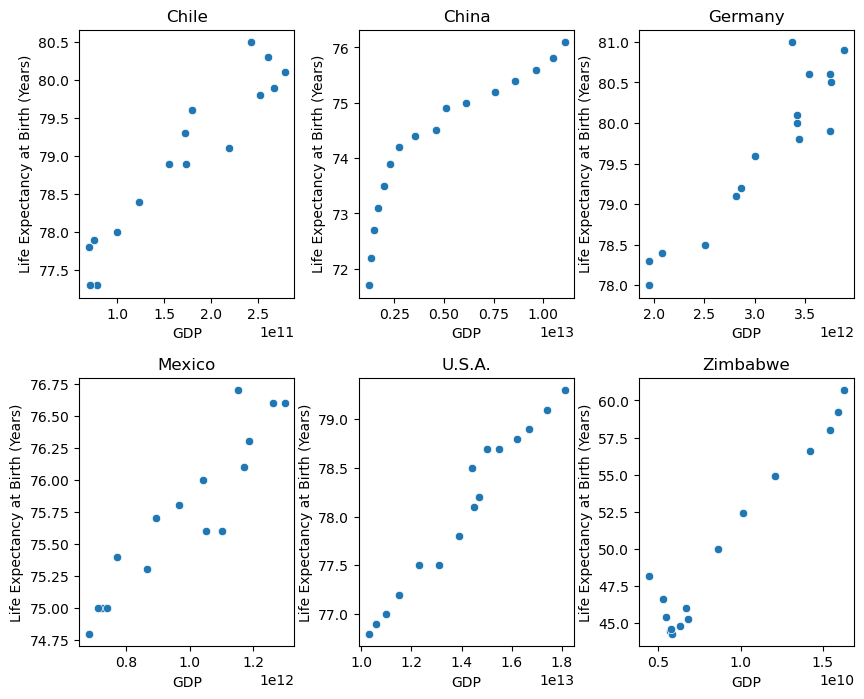

<Figure size 640x480 with 0 Axes>

In [15]:
#Show them in one graph
i = 1
plt.figure(figsize=(10, 8))
for country in countries:
    data_one_country = data[data['Country'] == country]
    ax = plt.subplot(2, 3, i)
    i += 1
    sns.scatterplot(data=data_one_country, x='GDP', y='life_expectancy')
    plt.title(country)
    plt.ylabel('Life Expectancy at Birth (Years)')
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()
plt.clf()

Each country's relationship between GDP and life expectancy is now more properly shown.
The positive correlation between GDP and life_expectancy is again confirmed.

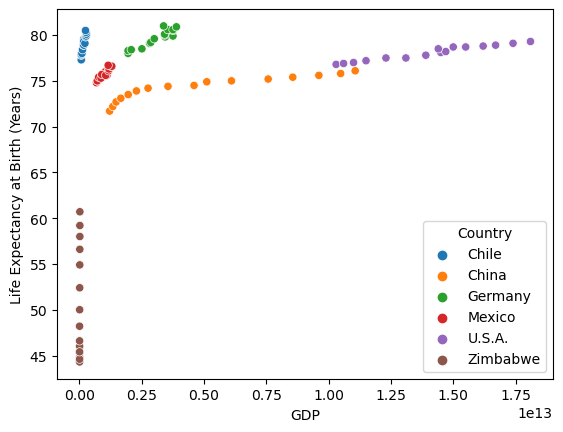

<Figure size 640x480 with 0 Axes>

In [16]:
#showing all countries together again with country as hue.
sns.scatterplot(data=data, x='GDP', y='life_expectancy', hue='Country')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.show()
plt.clf()

It can be seen that each country's data points are too concententrated in their own clusters, as their GDP fluctuate in their respective range.
Going through a log transformation should make the data show even better.

In [17]:
data['log_GDP'] = np.log(data['GDP'])

In [18]:
print(data.head())

  Country  Year  life_expectancy           GDP    log_GDP
0   Chile  2000             77.3  7.786093e+10  25.078190
1   Chile  2001             77.3  7.097992e+10  24.985663
2   Chile  2002             77.8  6.973681e+10  24.967994
3   Chile  2003             77.9  7.564346e+10  25.049297
4   Chile  2004             78.0  9.921039e+10  25.320509


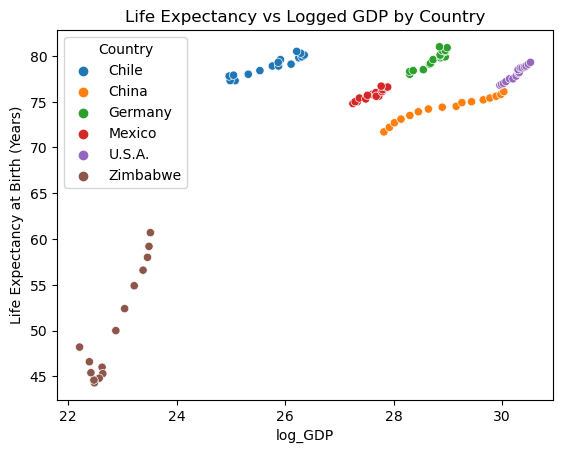

<Figure size 640x480 with 0 Axes>

In [19]:
sns.scatterplot(data=data, x='log_GDP', y='life_expectancy', hue='Country')
plt.title('Life Expectancy vs Logged GDP by Country')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.show()
plt.clf()

Data points for Zimbabwe are now more spread out.
It is now more evident that:
(1) for Chile and Germany, even though their GDP may not have been the highset, their life-expectancy has been the highest.
(2) for Zimbabwe, the same increase in GDP correlates with much bigger increase in life expectancy, compared to other countries.

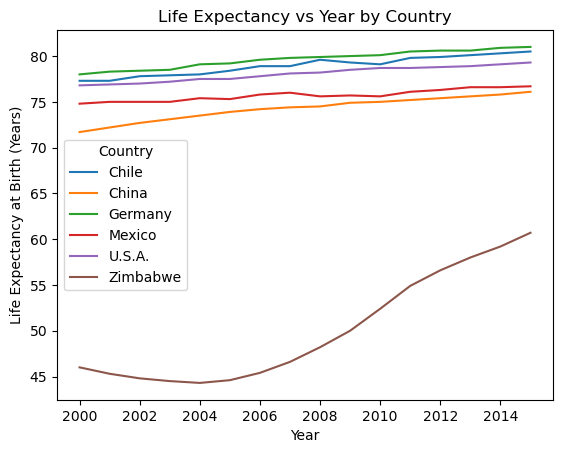

<Figure size 640x480 with 0 Axes>

In [20]:
#Time vs life expectancy
sns.lineplot(data=data, x='Year', y='life_expectancy', hue='Country')
plt.title('Life Expectancy vs Year by Country')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.show()
plt.clf()

For all countries, life expectancy is trending up over the years. Although, for most countries, the increase is within 5 years. Zimbabwe, however, saw a much more dramatic increase between 2004 and 2014, with life expectancy increasing by about 15 years.

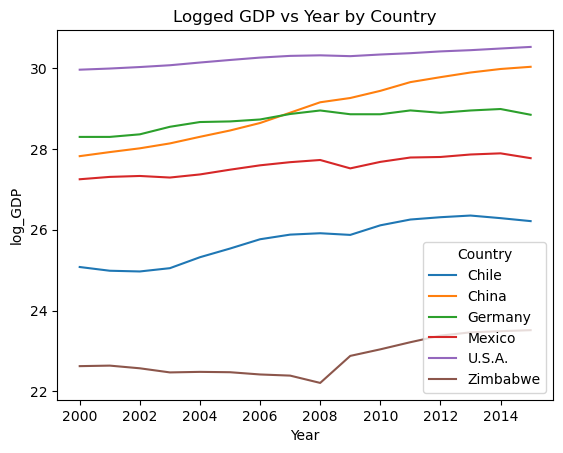

<Figure size 640x480 with 0 Axes>

In [21]:
sns.lineplot(data=data, x='Year', y='log_GDP', hue='Country')
plt.title('Logged GDP vs Year by Country')
plt.show()
plt.clf()

For the majority of countries, GDP is trending up by year overall. For Zimbabwe, starting in 2008, GDP started to bounce back up and increase sharply from then on.

Conclusions:
1. Process:
    
    (1) Previewed the data and checked summary statistics.
    
    (2) Did some tidying to faciliate easier data analysis.
    
    (3) Exploratory data analysis, including univariate, bivariate, and multivariate.    
2. Findings: 
    
    (1) Higher GDP correlates with higher life expectancy within a country.
    
    (2) Countries with lower GDP can have higher life expectancy than those with higher GDP.
    
    (3) The same increase in GDP may have different impact in life expectancy for different countries.

3. Comment:
    
    Most results are as expected, even though it is still refreshing to see countries like Germany and Chile having the higher life expectancy, consistenly, when they don't have the highest GDP, compared to China and the US. Lower population, better welfare policies, and better education may be among the factors that have contributed to this.
4. Next steps: Try adding the GDP element into the time vs. life expectancy chart to further enrich the visualization.